# Statystyki miliarderów
**Zbiór danych zawiera statystyki dotyczące miliarderów na świecie, zawarte są również ich dane osobowe, branże którymi się zajmują oraz firmy.**

**Został on pobrany z serwisu Kaggle.**

[Źródło](https://www.kaggle.com/datasets/nelgiriyewithana/billionaires-statistics-dataset)

# Potencjalne wykresy
* Analiza rozkładu majątku: Zbadanie rozkład majątku miliarderów w różnych branżach, krajach i regionach.

* Analiza demograficzna: Przedstawienie wieku, płeci i miejsca urodzenia miliarderów.

* Samodzielnie wytworzone vs. odziedziczone bogactwo: Analiza odseteku samodzielnie stworzonych miliarderów i tych, którzy odziedziczyli swój majątek.

* Wskaźniki ekonomiczne: Zbadanie korelacji między bogactwem miliarderów a wskaźnikami ekonomicznymi, takimi jak PKB, CPI (wskaźnik cen towarów i usług) i stawki podatkowe.

* Analiza geoprzestrzenna: Wizualizacja geograficznego rozmieszczenia miliarderów i ich majątku na mapie.

* Trendy w czasie: Prześledzenie zmian demograficznych i majątkowych miliarderów na przestrzeni lat.



# Wykresy testowe oraz przedstawienie zbioru danych

In [21]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

plt.style.use('ggplot')

In [22]:
df = pd.read_csv('data.csv')

In [23]:
df.head()

rank  finalWorth               category                personName   age  \
0     1      211000       Fashion & Retail  Bernard Arnault & family  74.0   
1     2      180000             Automotive                 Elon Musk  51.0   
2     3      114000             Technology                Jeff Bezos  59.0   
3     4      107000             Technology             Larry Ellison  78.0   
4     5      106000  Finance & Investments            Warren Buffett  92.0   

         country    city              source             industries  \
0         France   Paris                LVMH       Fashion & Retail   
1  United States  Austin       Tesla, SpaceX             Automotive   
2  United States  Medina              Amazon             Technology   
3  United States   Lanai              Oracle             Technology   
4  United States   Omaha  Berkshire Hathaway  Finance & Investments   

  countryOfCitizenship  ... cpi_change_country           gdp_country  \
0               France  ...                1.1   $2,715,518,274,227    
1        United States  ...                7.5  $21,427,700,000,000    
2        United States  ...                7.5  $21,427,700,000,000    
3        United States  ...                7.5  $21,427,700,000,000    
4        United States  ...                7.5  $21,427,700,000,000    

  gross_tertiary_education_enrollment  \
0                                65.6   
1                                88.2   
2                                88.2   
3                                88.2   
4                                88.2   

  gross_primary_education_enrollment_country life_expectancy_country  \
0                                      102.5                    82.5   
1                                      101.8                    78.5   
2                                      101.8                    78.5   
3                                      101.8                    78.5   
4                                      101.8                    78.5   

  tax_revenue_country_country total_tax_rate_country population_country  \
0                        24.2                   60.7         67059887.0   
1                         9.6                   36.6        328239523.0   
2                         9.6                   36.6        328239523.0   
3                         9.6                   36.6        328239523.0   
4                         9.6                   36.6        328239523.0   

  latitude_country longitude_country  
0        46.227638          2.213749  
1        37.090240        -95.712891  
2        37.090240        -95.712891  
3        37.090240        -95.712891  
4        37.090240        -95.712891  

[5 rows x 35 columns]

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2640 entries, 0 to 2639
Data columns (total 35 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   rank                                        2640 non-null   int64  
 1   finalWorth                                  2640 non-null   int64  
 2   category                                    2640 non-null   object 
 3   personName                                  2640 non-null   object 
 4   age                                         2575 non-null   float64
 5   country                                     2602 non-null   object 
 6   city                                        2568 non-null   object 
 7   source                                      2640 non-null   object 
 8   industries                                  2640 non-null   object 
 9   countryOfCitizenship                        2640 non-null   object 
 10  organization

In [25]:
df.isnull().sum()

rank                                             0
finalWorth                                       0
category                                         0
personName                                       0
age                                             65
country                                         38
city                                            72
source                                           0
industries                                       0
countryOfCitizenship                             0
organization                                  2315
selfMade                                         0
status                                           0
gender                                           0
birthDate                                       76
lastName                                         0
firstName                                        3
title                                         2301
date                                             0
state                          

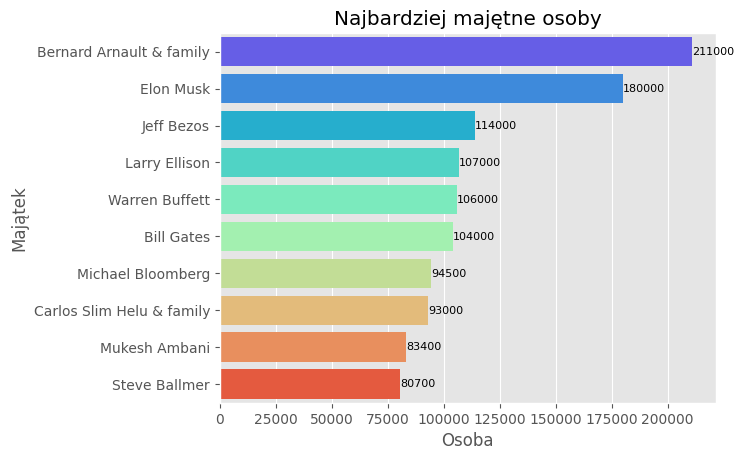

In [26]:
ax = sns.barplot(df.head(10), x='finalWorth',y='personName', hue = 'personName', legend = False,orient='h', palette='rainbow')
ax.set_title('Najbardziej majętne osoby')
ax.set_xlabel('Osoba')
ax.set_ylabel('Majątek')
for container in ax.containers:
    ax.bar_label(container, fontsize=8)
plt.show()

In [27]:
ppl_in_countries = df.groupby('countryOfCitizenship')['rank'].count().reset_index().sort_values(by ='rank',ascending=False).head(20)

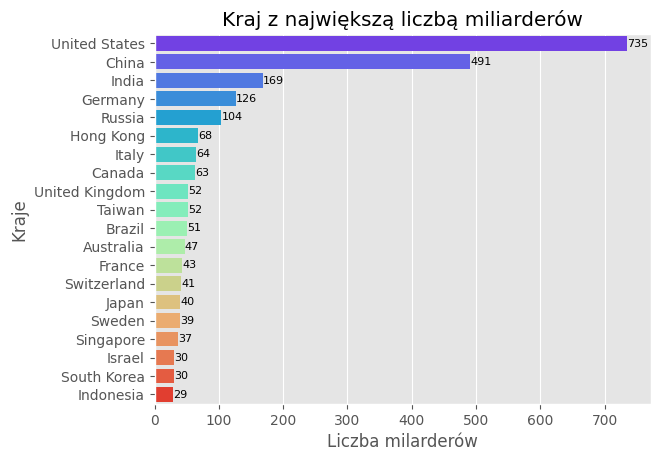

In [28]:
ax = sns.barplot(ppl_in_countries,x='rank',y='countryOfCitizenship',orient='h',hue = 'countryOfCitizenship', legend = False, palette='rainbow')
ax.set_title('Kraj z największą liczbą miliarderów')
ax.set_ylabel('Kraje')
ax.set_xlabel('Liczba milarderów')
for container in ax.containers:
    ax.bar_label(container, fontsize=8)
plt.show()

In [29]:
age_and_wealthy = df.groupby('age')['finalWorth'].mean()

In [30]:
age_and_wealthy

age
18.0     3500.000000
19.0     1700.000000
20.0     2300.000000
21.0     2600.000000
26.0     1450.000000
            ...     
96.0     4366.666667
97.0     1425.000000
98.0     1750.000000
99.0     4375.000000
101.0    1300.000000
Name: finalWorth, Length: 79, dtype: float64

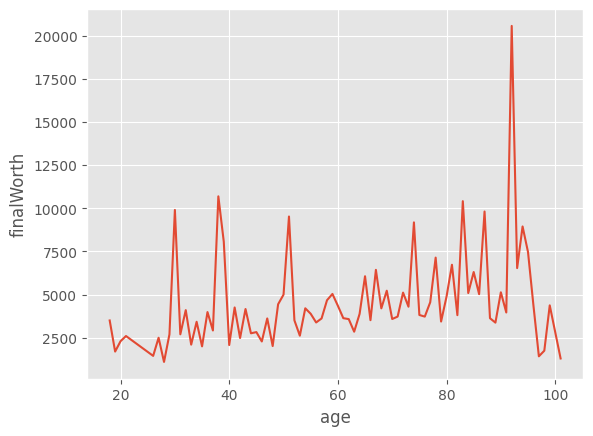

In [31]:
sns.lineplot(df, x='age', y='finalWorth',errorbar=None)
plt.show()

In [32]:
#category = df.explode('category')
categories = df.groupby('category')['rank'].count().sort_values(ascending=False).reset_index().head(20)


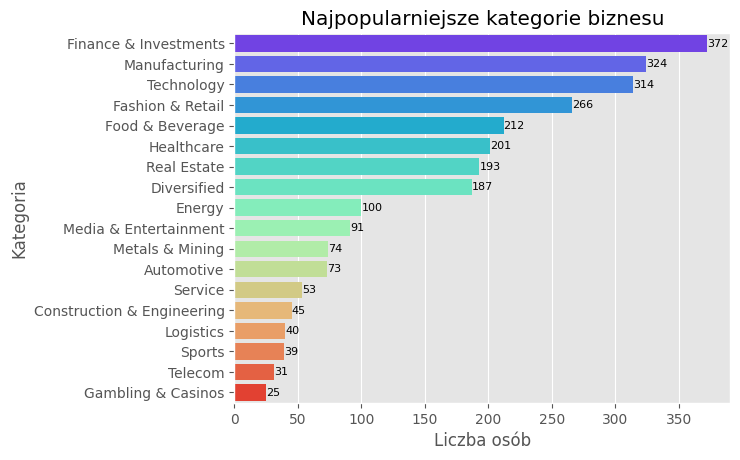

In [33]:
ax = sns.barplot(categories,x='rank',y='category',orient='h',hue = 'category', legend = False, palette='rainbow')
ax.set_title('Najpopularniejsze kategorie biznesu')
ax.set_ylabel('Kategoria')
ax.set_xlabel('Liczba osób')
for container in ax.containers:
    ax.bar_label(container, fontsize=8)
plt.show()

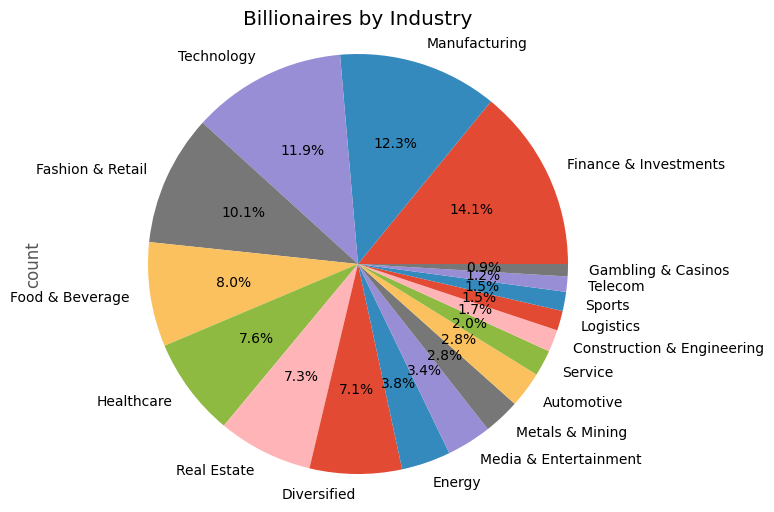

In [34]:
plt.figure(figsize=(8, 6))
df['category'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Billionaires by Industry')
plt.axis('equal')
plt.show()

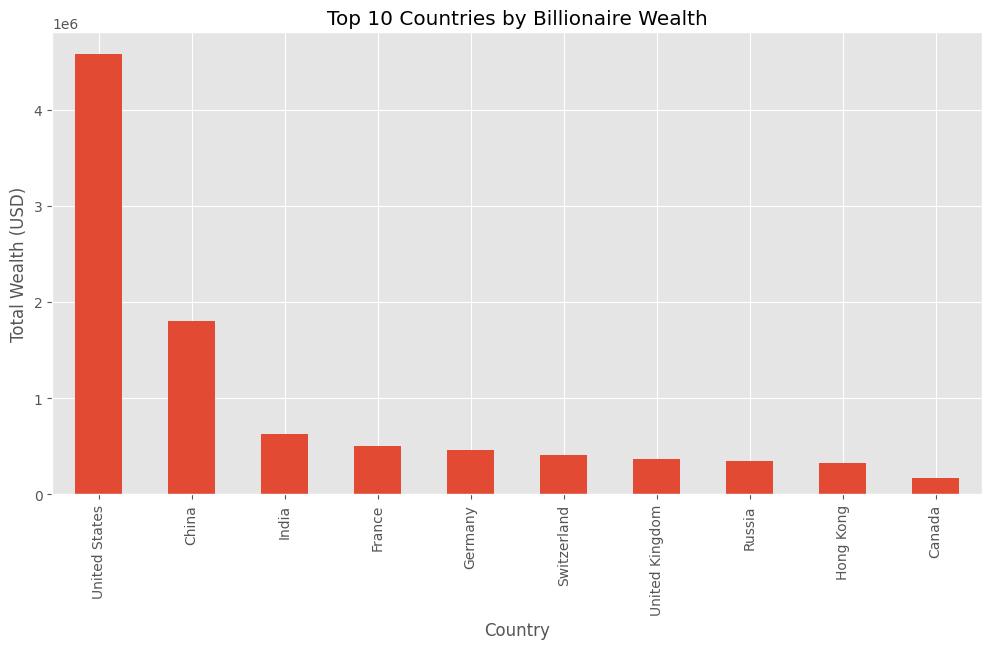

In [35]:
world_map = plt.figure(figsize=(12, 6))
ax = world_map.add_subplot(111)
df.groupby('country')['finalWorth'].sum().sort_values(ascending=False).head(10).plot(kind='bar', ax=ax)
plt.title('Top 10 Countries by Billionaire Wealth')
plt.xlabel('Country')
plt.ylabel('Total Wealth (USD)')
plt.xticks(rotation=90)
plt.show()

# Przykładowe wykresy z internetu


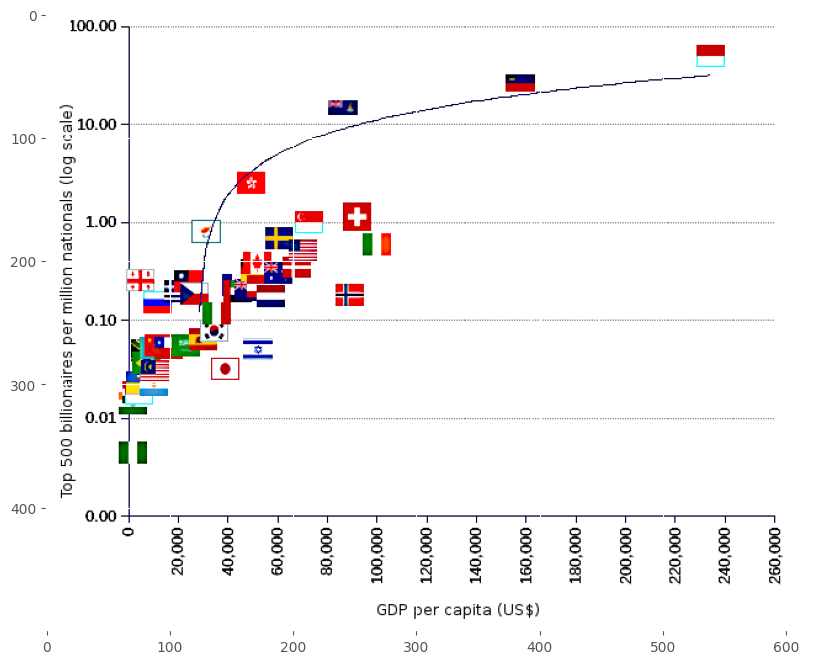

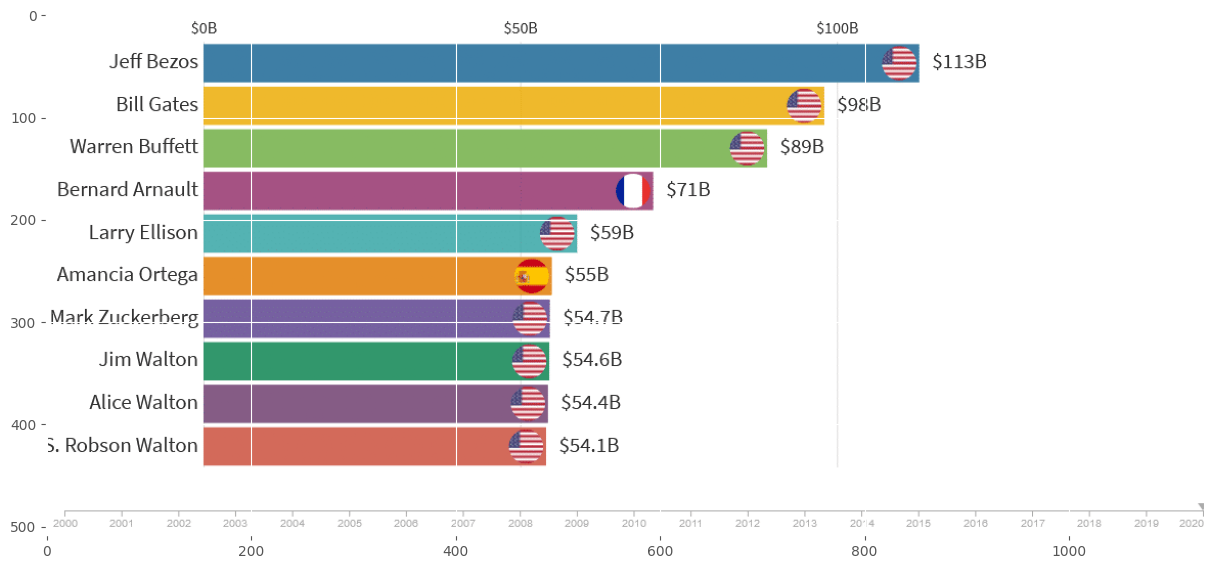

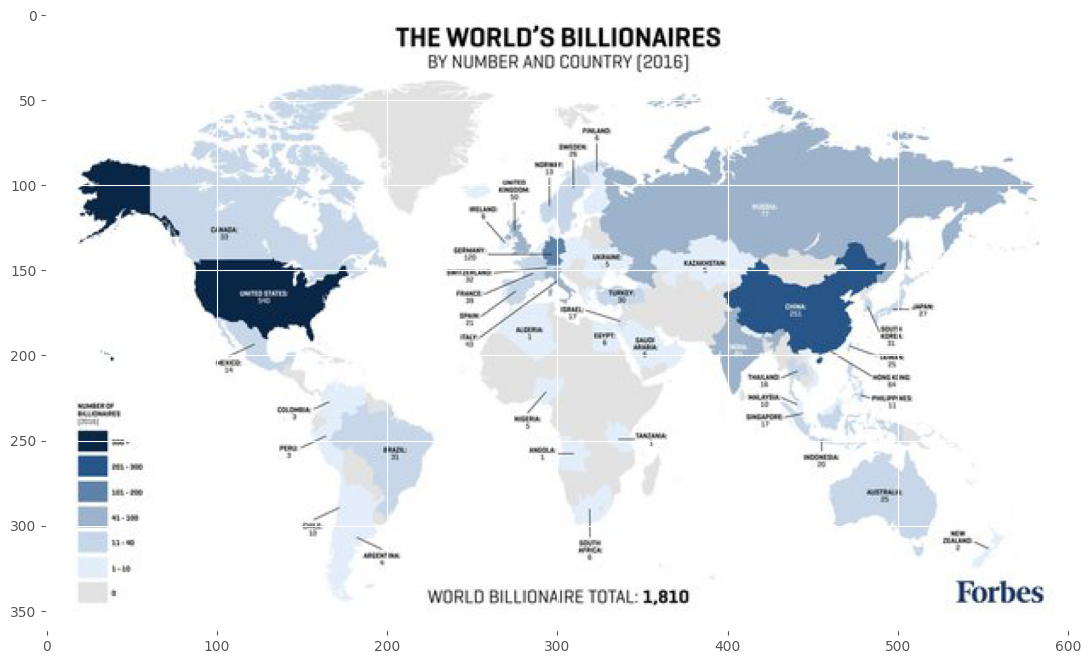

In [36]:
for i in ['images/kraje.png', 'images/top.png', 'images/world.jpeg']:
    imga = mpimg.imread(i)
    plt.figure(figsize=(15,8))
    imgplot = plt.imshow(imga)
